In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combinations.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
cities

['souillac',
 'bluff',
 'rikitea',
 'amderma',
 'kodiak',
 'tsihombe',
 'puerto ayora',
 'umarkot',
 'hermanus',
 'ayr',
 'nemuro',
 'georgetown',
 'tiznit',
 'sao filipe',
 'narasannapeta',
 'mataura',
 'aberdeen',
 'natal',
 'albany',
 'hasaki',
 'barrow',
 'punta arenas',
 'shchelkun',
 'grindavik',
 'vila velha',
 'east london',
 'kismayo',
 'busselton',
 'ushuaia',
 'luderitz',
 'manzhouli',
 'provideniya',
 'agirish',
 'avarua',
 'illoqqortoormiut',
 'pringsewu',
 'port lincoln',
 'dikson',
 'castro',
 'turangi',
 'palabuhanratu',
 'pyinmana',
 'quatre cocos',
 'khatanga',
 'tura',
 'butaritari',
 'mbaiki',
 'jardim',
 'tetelzingo',
 'marawi',
 'port alfred',
 'rungata',
 'kapaa',
 'trincomalee',
 'sabibah',
 'fortuna',
 'san patricio',
 'husavik',
 'maldonado',
 'cascais',
 'cape town',
 'taolanaro',
 'belushya guba',
 'murgab',
 'dingle',
 'cidreira',
 'mar del plata',
 'vaitupu',
 'jamestown',
 'jha jha',
 'mys shmidta',
 'yellowknife',
 'tashtagol',
 'ambodifototra',
 'ust-ku

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print('Beginning Data Retrieval       ')
print('-------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ','+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

# Indicate that Dat Loading is complete.
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | umarkot
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | ayr
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | tiznit
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | narasannapeta
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | aberdeen
Processing Record 18 of Set 1 | natal
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | punta aren

Processing Record 38 of Set 4 | guasdualito
Processing Record 39 of Set 4 | ladario
Processing Record 40 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 41 of Set 4 | raga
Processing Record 42 of Set 4 | tapes
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | arraial do cabo
Processing Record 45 of Set 4 | sun city west
Processing Record 46 of Set 4 | orlik
Processing Record 47 of Set 4 | scottsburgh
City not found. Skipping...
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | novikovo
Processing Record 2 of Set 5 | marystown
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | novobirilyussy
Processing Record 5 of Set 5 | ingham
Processing Record 6 of Set 5 | kourou
Processing Record 7 of Set 5 | vanimo
Processing Record 8 of Set 5 | tulun
Processing Record 9 of Set 5 | troitskoye
Processing Record 10 of Set 5 

Processing Record 25 of Set 8 | yarim
Processing Record 26 of Set 8 | unai
Processing Record 27 of Set 8 | katsuura
Processing Record 28 of Set 8 | biltine
Processing Record 29 of Set 8 | nantucket
Processing Record 30 of Set 8 | aksehir
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | ullapool
Processing Record 33 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 34 of Set 8 | bani walid
Processing Record 35 of Set 8 | misratah
Processing Record 36 of Set 8 | machakos
Processing Record 37 of Set 8 | nhulunbuy
Processing Record 38 of Set 8 | nguiu
City not found. Skipping...
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | lolua
City not found. Skipping...
Processing Record 42 of Set 8 | aksarka
Processing Record 43 of Set 8 | tabuk
Processing Record 44 of Set 8 | cap malheureux
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | bukit bakri
City 

Processing Record 10 of Set 12 | jacareacanga
Processing Record 11 of Set 12 | bossier city
Processing Record 12 of Set 12 | quievrain
Processing Record 13 of Set 12 | port-gentil
Processing Record 14 of Set 12 | komsomolskiy
Processing Record 15 of Set 12 | mayumba
Processing Record 16 of Set 12 | devyatka
City not found. Skipping...
Processing Record 17 of Set 12 | tiarei
Processing Record 18 of Set 12 | altagracia de orituco
Processing Record 19 of Set 12 | evensk
Processing Record 20 of Set 12 | halifax
Processing Record 21 of Set 12 | usinsk
Processing Record 22 of Set 12 | atherton
Processing Record 23 of Set 12 | margate
Processing Record 24 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 25 of Set 12 | kutum
Processing Record 26 of Set 12 | iraquara
Processing Record 27 of Set 12 | dudinka
Processing Record 28 of Set 12 | montemorelos
Processing Record 29 of Set 12 | north myrtle beach
Processing Record 30 of Set 12 | vestmannaeyjar
Processing Record 31 of S

In [11]:
len(city_data)

550

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.52,57.52,71.60,83,75,11.41,MU,2020-08-26 20:00:41
1,Bluff,-46.60,168.33,45.00,72,38,11.01,NZ,2020-08-26 20:02:27
2,Rikitea,-23.12,-134.97,68.43,58,1,3.47,PF,2020-08-26 20:02:28
3,Kodiak,57.79,-152.41,55.40,71,90,2.35,US,2020-08-26 19:59:22
4,Puerto Ayora,-0.74,-90.35,77.00,57,77,19.46,EC,2020-08-26 20:02:28
5,Umarkot,25.36,69.74,83.03,76,57,16.28,PK,2020-08-26 20:01:38
6,Hermanus,-34.42,19.23,53.51,77,0,15.95,ZA,2020-08-26 20:02:28
7,Ayr,55.46,-4.63,59.00,87,40,6.93,GB,2020-08-26 20:02:28
8,Nemuro,43.32,145.57,65.77,98,72,3.49,JP,2020-08-26 20:02:28
9,Georgetown,5.41,100.34,82.40,88,20,3.36,MY,2020-08-26 19:59:28


In [30]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [31]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2020-08-26 20:00:41,-20.52,57.52,71.60,83,75,11.41
1,Bluff,NZ,2020-08-26 20:02:27,-46.60,168.33,45.00,72,38,11.01
2,Rikitea,PF,2020-08-26 20:02:28,-23.12,-134.97,68.43,58,1,3.47
3,Kodiak,US,2020-08-26 19:59:22,57.79,-152.41,55.40,71,90,2.35
4,Puerto Ayora,EC,2020-08-26 20:02:28,-0.74,-90.35,77.00,57,77,19.46
5,Umarkot,PK,2020-08-26 20:01:38,25.36,69.74,83.03,76,57,16.28
6,Hermanus,ZA,2020-08-26 20:02:28,-34.42,19.23,53.51,77,0,15.95
7,Ayr,GB,2020-08-26 20:02:28,55.46,-4.63,59.00,87,40,6.93
8,Nemuro,JP,2020-08-26 20:02:28,43.32,145.57,65.77,98,72,3.49
9,Georgetown,MY,2020-08-26 19:59:28,5.41,100.34,82.40,88,20,3.36


In [15]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [17]:
# Import the time module:
import time

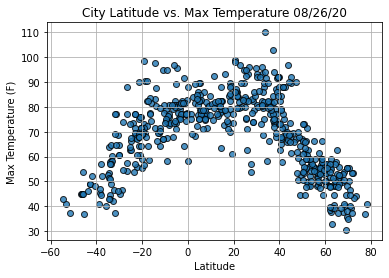

In [18]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

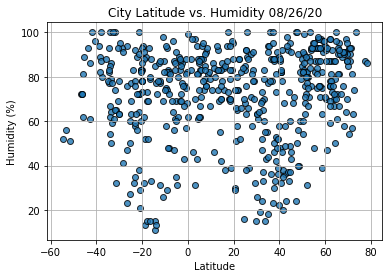

In [19]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

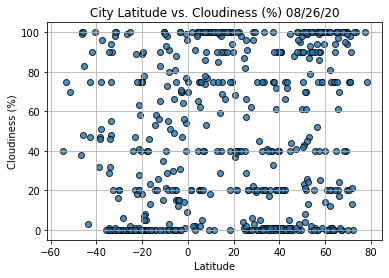

In [20]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

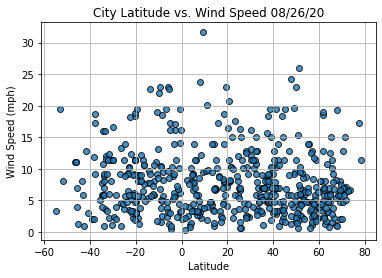

In [21]:
# Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')
    
# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

In [45]:
# Import linear regression from SciPy stats module
from scipy.stats import linregress

In [64]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equestion of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
# Loc method to get a specific row
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2020-08-26 19:59:43
Lat                        -46.19
Lng                        168.86
Max Temp                       45
Humidity                       72
Cloudiness                    100
Wind Speed                  11.01
Name: 13, dtype: object

In [66]:
# Filter based on value of a row
city_data_df['Lat'] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
545    False
546     True
547    False
548     True
549    False
Name: Lat, Length: 550, dtype: bool

In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <= 0)]

In [68]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Kodiak,US,2020-08-26 19:59:22,57.79,-152.41,55.40,71,90,2.35
5,Umarkot,PK,2020-08-26 20:01:38,25.36,69.74,83.03,76,57,16.28
7,Ayr,GB,2020-08-26 20:02:28,55.46,-4.63,59.00,87,40,6.93
8,Nemuro,JP,2020-08-26 20:02:28,43.32,145.57,65.77,98,72,3.49
9,Georgetown,MY,2020-08-26 19:59:28,5.41,100.34,82.40,88,20,3.36


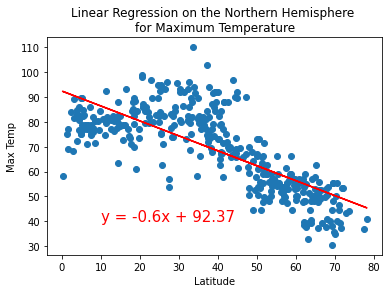

In [71]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for Maximum Temperature", 'Max Temp', (10,40))

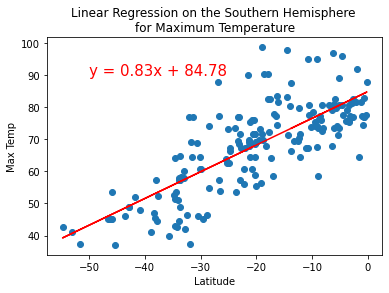

In [72]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for Maximum Temperature", 'Max Temp', (-50,90))

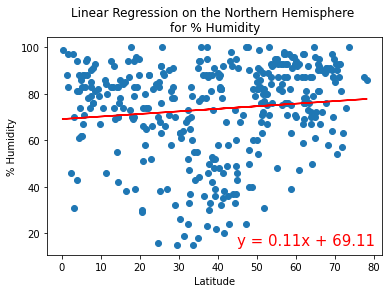

In [78]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for % Humidity", '% Humidity', (45,15))

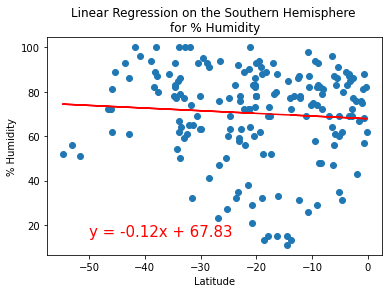

In [79]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for % Humidity", '% Humidity', (-50,15))

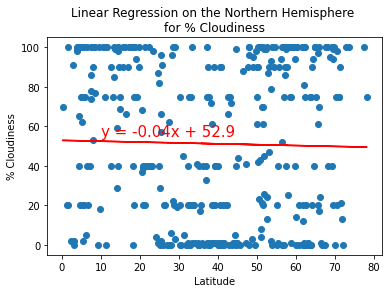

In [80]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for % Cloudiness", '% Cloudiness', (10,55))

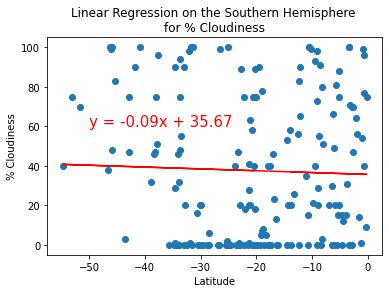

In [81]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for % Cloudiness", '% Cloudiness', (-50,60))

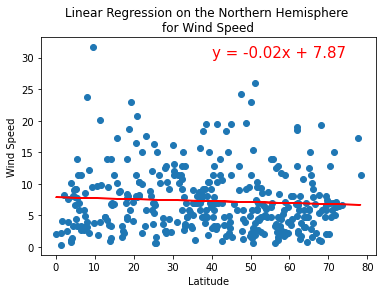

In [85]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n" 
                       "for Wind Speed", 'Wind Speed', (40,30))

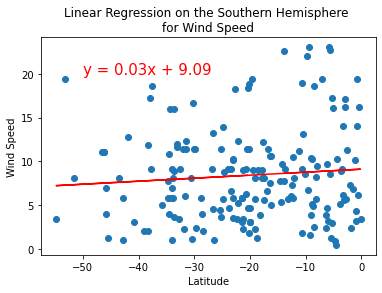

In [87]:
# Linear regression on the southern Hemisphere.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n" 
                       "for Wind Speed", 'Wind Speed', (-50,20))